In [21]:
import random

# Number of questions
num_questions = 85  # You can change this to the number of questions you have

# Generate random answers for each question
answers = [random.choice(['A', 'B', 'C', 'D', 'E']) for _ in range(num_questions)]

# Create and write to a text file
with open('answers.txt', 'w') as file:
    for i, answer in enumerate(answers, start=1):
        file.write(f"{i}. {answer}\n")

print("Answers have been generated and stored in 'answers.txt'.")

Answers have been generated and stored in 'answers.txt'.


In [22]:
pip install stegano

In [23]:
from stegano import lsb
from PIL import Image

# Read the text file
with open("answers.txt", "r") as file:
    plaintext = file.read()

# Load the original image
original_image = Image.open("CheckerBoardSeemlessPattern.jpg")

# Hide the text in the image
secret = lsb.hide(original_image, plaintext)
secret.save("encrypted_image.png")

# Reload the original image for comparison
original_image = Image.open("CheckerBoardSeemlessPattern.jpg")

# Convert images to RGB mode
original_image_rgb = original_image.convert("RGB")
secret_rgb = secret.convert("RGB")

# Get pixel data
original_pixels = list(original_image_rgb.getdata())
secret_pixels = list(secret_rgb.getdata())

# Compare original and encrypted pixels
for i in range(min(len(original_pixels), len(secret_pixels))):
    if original_pixels[i] != secret_pixels[i]:
        print(f"Pixel {i}: Original={original_pixels[i]}, Encrypted={secret_pixels[i]}")

Pixel 0: Original=(0, 0, 0), Encrypted=(0, 0, 1)
Pixel 1: Original=(0, 0, 0), Encrypted=(1, 0, 1)
Pixel 2: Original=(0, 0, 0), Encrypted=(0, 1, 0)
Pixel 3: Original=(0, 0, 0), Encrypted=(0, 1, 1)
Pixel 6: Original=(0, 0, 0), Encrypted=(1, 1, 0)
Pixel 7: Original=(0, 0, 0), Encrypted=(0, 0, 1)
Pixel 8: Original=(0, 0, 0), Encrypted=(0, 0, 1)
Pixel 9: Original=(0, 0, 0), Encrypted=(1, 1, 0)
Pixel 10: Original=(0, 0, 0), Encrypted=(1, 0, 0)
Pixel 11: Original=(0, 0, 0), Encrypted=(0, 1, 1)
Pixel 13: Original=(1, 1, 1), Encrypted=(1, 0, 0)
Pixel 14: Original=(1, 1, 1), Encrypted=(1, 0, 1)
Pixel 15: Original=(1, 1, 1), Encrypted=(1, 1, 0)
Pixel 16: Original=(85, 85, 85), Encrypted=(84, 84, 85)
Pixel 17: Original=(255, 255, 255), Encrypted=(254, 254, 254)
Pixel 18: Original=(249, 249, 249), Encrypted=(248, 248, 248)
Pixel 19: Original=(255, 255, 255), Encrypted=(255, 254, 254)
Pixel 20: Original=(255, 255, 255), Encrypted=(254, 255, 254)
Pixel 21: Original=(255, 255, 255), Encrypted=(254, 25

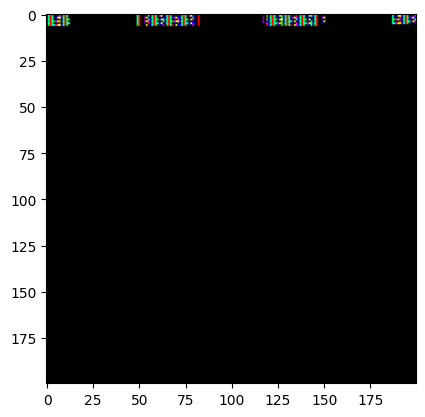

In [27]:
import matplotlib.pyplot as plt

# Amplify the differences by a factor of 10
diff = ImageChops.subtract(secret_rgb, original_image_rgb).point(lambda i: i * 10000)

# Display the image using matplotlib
plt.imshow(diff)
plt.show()


In [28]:
from stegano import lsb

# Extract the hidden text from the image
secret = lsb.reveal("encrypted_image.png")

# Write the decrypted text to a file
with open("decrypted_plaintext.txt", "w") as file:
    file.write(secret)
